In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import gpytorch
# from voltron.robinhood_utils import GetStockData
import os
# import robin_stocks.robinhood as r
import pickle5 as pickle

sns.set_style('white')
# style.use('whitegrid')
palette = ["#1b4079", "#C6DDF0", "#048A81", "#B9E28C", "#8C2155", "#AF7595", "#E6480F", "#FA9500"]
sns.set(palette = palette, font_scale=2.0, style="white", rc={"lines.linewidth": 4.0})

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.


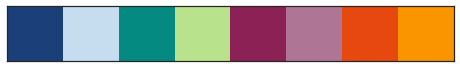

In [19]:
sns.palplot(palette)

In [2]:
mt_preds = torch.load("multitask_predictions.pt")
ind_preds = torch.load("ind_predictions.pt")

In [3]:
mt_emp_percentile = (mt_preds["paths"] > mt_preds["test_y"].unsqueeze(-2)).sum(1) / 100
ind_emp_percentile = (ind_preds["paths"] > ind_preds["test_y"].unsqueeze(-2)).sum(1) / 100

In [25]:
mt_emp_percentile.shape

torch.Size([10, 200])

In [52]:
bins = np.arange(0, 1, 0.05)

In [57]:
reshaped_mt_emp = mt_emp_percentile[:5].reshape(-1)
reshaped_ind_emp = ind_emp_percentile[:5].reshape(-1)

In [58]:
mt_counts, _ = np.histogram(reshaped_mt_emp, bins=bins)
ind_counts, _ = np.histogram(reshaped_ind_emp, bins=bins)

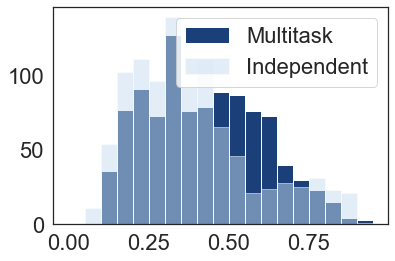

In [60]:
plt.hist(reshaped_mt_emp.numpy(), bins=bins, label = "Multitask")
plt.hist(reshaped_ind_emp.numpy(), bins=bins, alpha = 0.5, label = "Independent")
plt.legend()

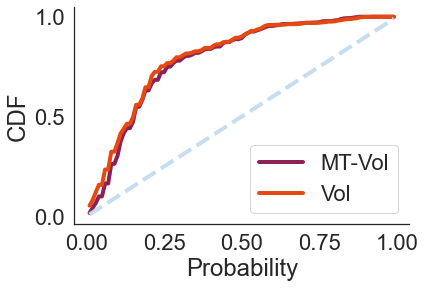

In [44]:
plt.plot(bins[1:], np.cumsum(mt_counts, 0) / reshaped_mt_emp.shape[0], color = palette[4], label = "MT-Vol")
plt.plot(bins[1:], np.cumsum(ind_counts, 0) / reshaped_mt_emp.shape[0], color = palette[-2], label = "Vol")
plt.plot(bins[1:], bins[1:], color = palette[1], linestyle="--")
plt.xlabel("Probability")
plt.ylabel("CDF")
plt.legend()
sns.despine()

In [34]:
def prep_ecdf(vec):
    vec = vec.reshape(-1)
    counts, _ = np.histogram(vec, bins=bins)
    return np.cumsum(counts, 0) / np.sum(counts)

0
1
2
3


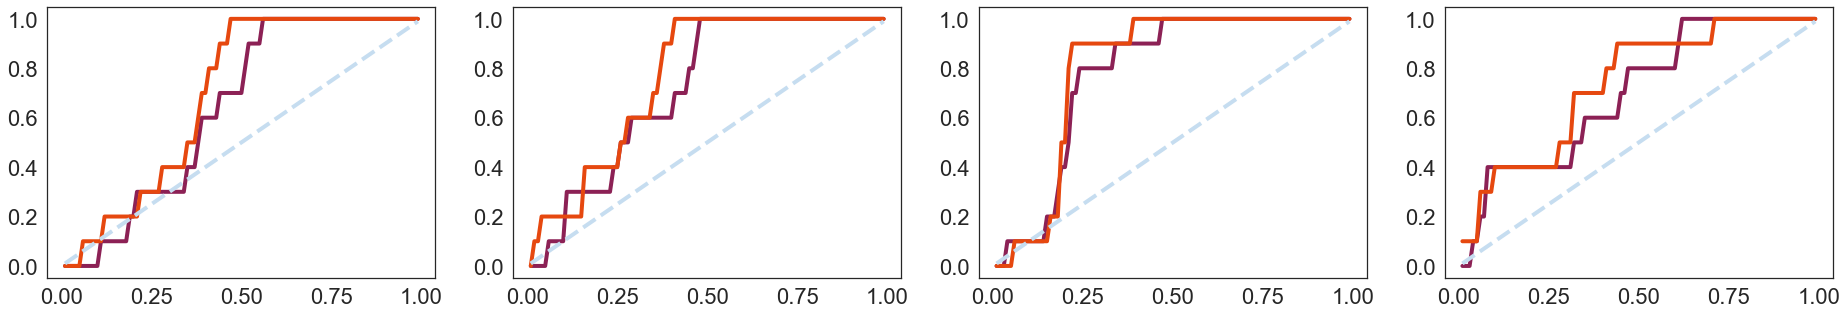

In [38]:
fig, ax = plt.subplots(1, 4, figsize = (32, 5))

times = [0, 50, 100, -1]
for i, time in enumerate(times):
    print(i)
    ax[i].plot(bins[1:], prep_ecdf(mt_emp_percentile[:, time]), color = palette[4], label = "MT-Vol")
    ax[i].plot(bins[1:], prep_ecdf(ind_emp_percentile[:, time]), color = palette[-2], label = "Vol")
    ax[i].plot(bins[1:], bins[1:], color = palette[1], linestyle="--")

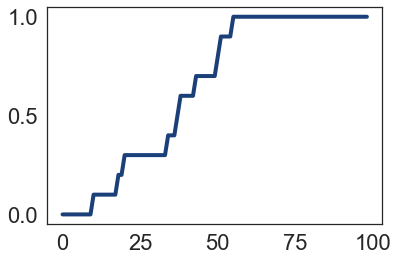

In [36]:
plt.plot(prep_ecdf(mt_emp_percentile[:, i]))

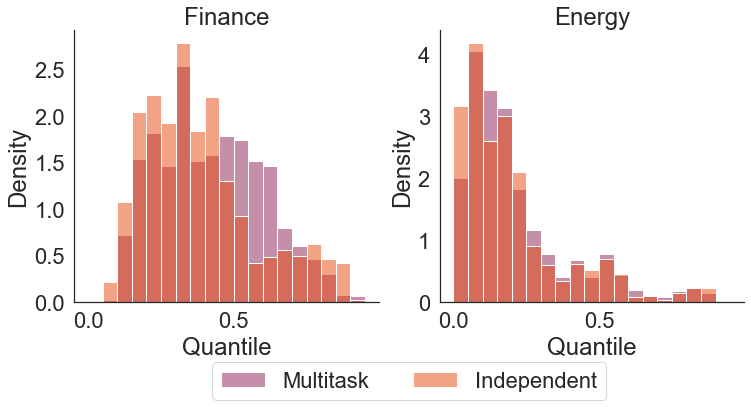

In [80]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.histplot(mt_emp_percentile[:5].numpy().reshape(-1), ax=ax[0], bins=bins, label = "Multitask",
            color=palette[4], alpha = 0.5, stat="density")
sns.histplot(ind_emp_percentile[:5].numpy().reshape(-1), ax=ax[0], bins=bins, alpha = 0.5, 
             label = "Independent", color = palette[-2], stat="density")


sns.histplot(mt_emp_percentile[5:].numpy().reshape(-1), ax=ax[1], bins=bins, label = "Multitask",
            color=palette[4], alpha = 0.5, stat="density")
sns.histplot(ind_emp_percentile[5:].numpy().reshape(-1), ax=ax[1], bins=bins, alpha = 0.5, 
             label = "Independent", color = palette[-2], stat="density")
ax[1].legend(ncol=2, bbox_to_anchor=(-0.1, -0.4), loc = "lower center")
#plt.tight_layout()
ax[0].set_xlabel("Quantile")
ax[1].set_xlabel("Quantile")

ax[0].set_title("Finance")
ax[1].set_title("Energy")
sns.despine()